# Nmag example 2.18

This notebook follows example 2.18 in the Nmag tutorial: http://nmag.soton.ac.uk/nmag/current/manual/singlehtml/manual.html#document-example_2Dperiodicity/doc

In [1]:
import dolfin as df
from finmag import Simulation as Sim
from finmag import sim_with
from finmag.energies import Exchange, Demag
from finmag.energies.demag import FKDemag
import finmag
finmag.set_logging_level('INFO')
%matplotlib inline

[2014-09-12 14:43:02] INFO: Finmag logging output will be appended to file: '/home/mb4e10/.finmag/global.log'
[2014-09-12 14:43:02] DEBUG: Building modules in 'native'...
[2014-09-12 14:43:03] DEBUG: FinMag          5437:fec84699273758d1c95aacbb1c8e304bb2b106bd
[2014-09-12 14:43:03] DEBUG: Dolfin          1.4.0                Matplotlib      1.3.1               
[2014-09-12 14:43:03] DEBUG: Numpy           1.8.1                Scipy           0.14.0              
[2014-09-12 14:43:03] DEBUG: IPython         2.1.0                Python          2.7.6               
[2014-09-12 14:43:03] DEBUG: Paraview        4.0.1-1ubuntu1       Sundials        2.5.0               
[2014-09-12 14:43:03] DEBUG: Boost-Python    <unknown>            Linux           Ubuntu 14.04.1 LTS  
[2014-09-12 14:43:03] DEBUG: Registering debug signal handler. Press Ctrl-Z at any time to stop execution and jump into the debugger.


The mesh used in simulation is a box with edge lengths $a$, $b$, and $c$. The distance between vertices along all edges is $l_\text{max} = 3 \,\text{nm}$.

In [2]:
# edge lengths (m)
a = 30
b = 10
c = 10
lmax = 3

mesh = df.BoxMesh(0, 0, 0, a, b, c, a/lmax, b/lmax, c/lmax)

The used material is Permalloy with the following parameters (saturation magnetsiation $M_\text{s}$, exchange constant $A$, and Gilbert damping $\alpha$):
$$M_\text{s} = 10^6 \text{A/m}$$
$$A = 13 \times 10^{-12} \text{J/m}$$
$$\alpha = 0.02$$

In [3]:
Ms = 1e6  # magnetisation saturation (A/m)
A = 13e-12  # exchange stiffness (J/m)
alpha = 0.02  # Gilbert damping

Now, the simulation object is created and both exchange and demagnetisation energies are added. The initial magnetisation is set uniform along the (1, 1, 1) direction.

In [4]:
sim = Sim(mesh, Ms, unit_length=1e-9)

sim.add(Exchange(A))
sim.add(Demag())
sim.set_m((1, 1, 1))
#sim_with(mesh, Ms=Ms, m_init=(1, 1, 1), alpha=alpha, A=A, unit_length=1e-9, name='rod')
sim.schedule('save_ndt', every=5e-12)
sim.relax()

[2014-09-12 14:43:09] INFO: Finmag logging output will be written to file: '/home/mb4e10/finmag/doc/ipython_notebooks_src/unnamed.log' (any old content will be overwritten).
[2014-09-12 14:43:09] INFO: Creating Sim object 'unnamed' (rank=0/1).
[2014-09-12 14:43:09] INFO: <Mesh of topological dimension 3 (tetrahedra) with 176 vertices and 540 cells, ordered>
[2014-09-12 14:43:10] INFO: Create integrator sundials with kwargs={}
[2014-09-12 14:43:10] INFO: Simulation will run until relaxation of the magnetisation.
[2014-09-12 14:43:13] INFO: Relaxation finished at time t = 4.4e-10.


The magnetisation is plotted.

/usr/lib/pymodules/python2.7/matplotlib/figure.py:1595: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


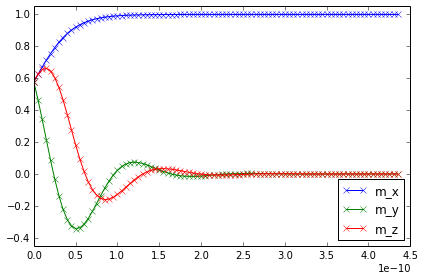

In [5]:
_ = sim.plot_dynamics(style='-x')

## 2D periodicity

Now, the same simulation is repeated, but with two dimensional periodicity.

In [6]:
finmag.set_logging_level('DEBUG')

In [7]:
sim2 = sim_with(mesh, Ms=Ms, m_init=[1, 1, 1], alpha=0.5, A=A,
                unit_length=1e-9, nx=11, ny=41, pbc='2d', name='rod_periodic')
sim2.schedule('save_ndt', every=5e-12)

[2014-09-12 14:43:20] INFO: Finmag logging output will be written to file: '/home/mb4e10/finmag/doc/ipython_notebooks_src/rod_periodic.log' (any old content will be overwritten).
[2014-09-12 14:43:20] DEBUG: Creating DataWriter for file 'rod_periodic.ndt'
[2014-09-12 14:43:20] INFO: Creating Sim object 'rod_periodic' (rank=0/1).
[2014-09-12 14:43:20] INFO: <Mesh of topological dimension 3 (tetrahedra) with 176 vertices and 540 cells, ordered>
[2014-09-12 14:43:20] DEBUG: Setting 2d periodic boundary conditions (in the xy-plane).
[2014-09-12 14:43:20] DEBUG: Creating LLG object.
[2014-09-12 14:43:20] DEBUG: Creating Exchange object with method box-matrix-petsc,  in Jacobian.
[2014-09-12 14:43:20] DEBUG: Adding interaction Exchange to simulation.
[2014-09-12 14:43:20] DEBUG: Creating Demag object with solver 'FK'.
[2014-09-12 14:43:20] DEBUG: Demag parameters now: {'phi_1': {'absolute_tolerance': 1e-06, 'relative_tolerance': 1e-06, 'maximum_iterations': 10000}, 'phi_2': {'absolute_tolera

In [8]:
finmag.set_logging_level('INFO')

In [9]:
sim2.relax()

[2014-09-12 14:43:29] INFO: Create integrator sundials with kwargs={}
[2014-09-12 14:43:29] INFO: Simulation will run until relaxation of the magnetisation.
[2014-09-12 14:43:42] INFO: Relaxation finished at time t = 2.4e-09.


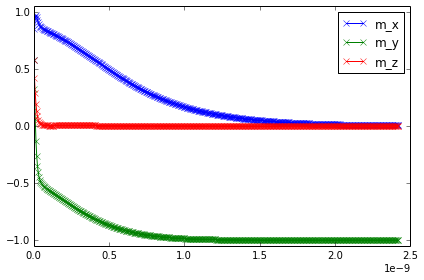

In [10]:
_ = sim2.plot_dynamics(style='-x')